In [1]:
###IMPORT REQUIRED PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colormaps as cmaps
import os

FIGURE 2: Sample B-Car Results

FIGURE 3: KNOCKOUTS

In [31]:
###READ IN KNOCKOUTS DATA
wt = 0.651

#Knockouts sweep

#Knockouts experiments - W sweep
knockouts = ["b1779", "b2277", "b0432", "b0721"]
ws = ['1.0e-7', '1.0e-5']
w_sweep_knockouts = pd.DataFrame()
for f in knockouts:
    for w in ws:
        if len(os.listdir('F:/additional_knockouts/knockouts/'+f)) != 0:
            sum_k = pd.read_csv('F:/additional_knockouts/knockouts/'+f+'/sum_data_'+f+'_'+w+'.csv')
            sum_k['k'] = f
            sum_k['w'] = w
            #Compute peak B-car concentration, rise time from ODE data
            ode_k = pd.read_csv('F:/additional_knockouts/knockouts/'+f+'/sim_ode_data_'+f+'_'+w+'.csv')
            peak_bcar = ode_k.bcar.max()
            steady_state_bcar = ode_k.bcar[len(ode_k)-1]
            rise_time_index = np.where(ode_k.bcar >= steady_state_bcar*0.5)[0][0]
            rise_time_bcar = ode_k.time[rise_time_index]
            sum_k['rise_time'] = rise_time_bcar
            sum_k['peak_bcar'] = peak_bcar
            sum_k['run_N'] = len(ode_k)
            w_sweep_knockouts = pd.concat([w_sweep_knockouts, sum_k])
print("N =", len(w_sweep_knockouts))
#Compute percent defect from raw growth rates
w_sweep_knockouts = w_sweep_knockouts.reset_index(drop=True)
w_sweep_knockouts['defect'] =[100*(1-(wt-w_sweep_knockouts.delta_lam[i])/wt) for i in range(len(w_sweep_knockouts))]


N = 8


<Axes: xlabel='w', ylabel='k'>

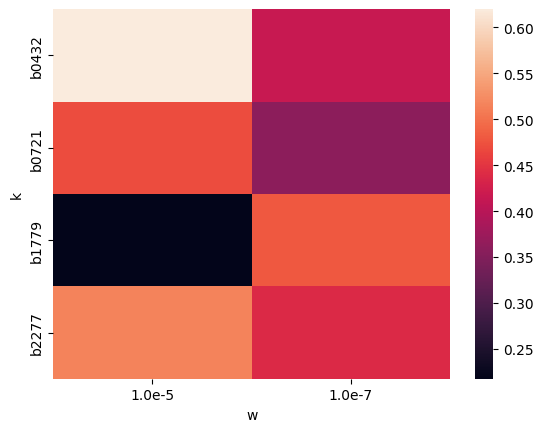

In [34]:
###FIGURE: Heatmap of W sweep experiment
defect_map = w_sweep_knockouts.pivot(index='k', columns='w', values='defect')
rise_time_map = w_sweep_knockouts.pivot(index='k', columns='w', values='rise_time')
peak_bcar_map = w_sweep_knockouts.pivot(index='k', columns='w', values='peak_bcar')
sns.heatmap(rise_time_map)

FIGURE 4: BURDEN